# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

plt.style.use("seaborn")
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("Crime_Reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324318 entries, 0 to 2324317
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 165
Occurred Date                        0
Occurred Time                       84
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21070
Address                             12
Zip Code                         14382
Council District                 47520
APD Sector                        9152
APD District                      9635
PRA                              10917
Census Tract                    604683
Clearance Status                608843
Clearance Date                  339648
UCR Category                   1530350
Category Description           1530350
X-coordinate                     10321
Y-coordinate                     10321
Latitude                         39334
Longitude                

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20191571574,FRAUD - OTHER,1199,N,06/03/2019 04:00:00 PM,06/03/2019,1600.0,06/06/2019 05:34:00 PM,06/06/2019,1734.0,DEPARTMENT / DISCOUNT STORE,10817 BALLARD PATH,78717.0,6.0,AD,5,573.0,203.11,NaN,NaN,NaN,NaN,3097785.0,3097785.0,30.483646,-97.789495,"(30.48364631, -97.7894953)"
1,20191550153,DEADLY CONDUCT,408,N,06/04/2019 03:12:00 AM,06/04/2019,312.0,06/04/2019 03:16:00 AM,06/04/2019,316.0,RESIDENCE / HOME,8312 N IH 35 SVRD SB,78753.0,4.0,ED,1,250.0,18.06,N,06/06/2019,13A,Aggravated Assault,3128227.0,3128227.0,30.346646,-97.696573,"(30.34664576, -97.69657342)"
2,20195022816,THEFT OF LICENSE PLATE,614,N,06/03/2019 03:00:00 PM,06/03/2019,1500.0,06/04/2019 03:22:00 PM,06/04/2019,1522.0,RESIDENCE / HOME,6312 LIBYAN DR,78745.0,2.0,FR,4,509.0,24.09,N,06/04/2019,23G,Theft,3098393.0,3098393.0,30.205267,-97.794900,"(30.20526729, -97.79490043)"
3,20205007833,RUNAWAY CHILD,4100,N,02/22/2020 06:00:00 PM,02/22/2020,1800.0,02/24/2020 06:03:00 PM,02/24/2020,1803.0,RESIDENCE / HOME,13012 DEARBONNE DR,78617.0,2.0,HE,7,612.0,NaN,N,03/03/2020,NaN,NaN,3155456.0,3155456.0,30.176140,-97.615031,"(30.17613952, -97.6150307)"
4,20191671388,BURGLARY OF RESIDENCE,500,N,06/14/2019 12:00:00 PM,06/14/2019,1200.0,06/16/2019 10:00:00 PM,06/16/2019,2200.0,RESIDENCE / HOME,3809 SPICEWOOD SPRINGS RD EB,78731.0,10.0,BA,8,256.0,17.51,N,09/18/2019,220,Burglary,3111039.0,3111039.0,30.364987,-97.750587,"(30.36498691, -97.75058749)"


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2324313,20143631822,FAMILY DISTURBANCE,3400,N,12/29/2014 11:41:00 PM,12/29/2014,2341.0,12/29/2014 11:41:00 PM,12/29/2014,2341.0,RESIDENCE / HOME,109 MASTERSON PASS,78753.0,4.0,ED,1,240.0,18.23,N,01/02/2015,NaN,NaN,3130776.0,3130776.0,30.369795,-97.687855,"(30.36979494, -97.68785533)"
2324314,20191270738,THEFT BY SHOPLIFTING,607,N,05/07/2019 10:50:00 AM,05/07/2019,1050.0,05/07/2019 11:31:00 AM,05/07/2019,1131.0,DEPARTMENT / DISCOUNT STORE,11423 N LAMAR BLVD,78753.0,7.0,ED,4,221.0,18.24,NaN,NaN,23C,Theft,3131578.0,3131578.0,30.383630,-97.684932,"(30.38362955, -97.68493154)"
2324315,2008501470,CRIMINAL TRESPASS/TRANSIENT,2721,N,02/19/2008 05:00:00 PM,02/19/2008,1700.0,02/19/2008 05:00:00 PM,02/19/2008,1700.0,PARKING LOTS / GARAGE,6800 BERKMAN DR,78723.0,1.0,ID,5,293.0,21.00,NaN,NaN,NaN,NaN,3130390.0,3130390.0,30.320281,-97.690437,"(30.32028083, -97.6904366)"
2324316,2003921400113,DWI,2100,N,05/20/2003 01:32:00 AM,05/20/2003,132.0,05/20/2003 01:32:00 AM,05/20/2003,132.0,STREETS / HWY / ROAD / ALLEY,4500 N MOPAC EXPY NB,78731.0,10.0,BA,6,325.0,1.00,C,05/22/2003,NaN,NaN,3109748.0,3109748.0,30.320565,-97.755869,"(30.32056515, -97.7558693)"
2324317,20081340129,URINATING IN PUBLIC PLACE,3212,N,05/13/2008 01:10:00 AM,05/13/2008,110.0,05/13/2008 01:10:00 AM,05/13/2008,110.0,STREETS / HWY / ROAD / ALLEY,400 BLOCK E 6TH ST,78701.0,9.0,GE,2,382.0,11.00,C,05/17/2008,NaN,NaN,3115491.0,3115491.0,30.267351,-97.739093,"(30.26735144, -97.73909331)"


## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
def clean_data(df):
    drop_col = [
        "Incident Number",
        "Occurred Time",
        "Occurred Date Time",
        "Highest Offense Code",
        "Census Tract",
        "PRA",
        "Report Date",
        "Report Time",
        "UCR Category",
        "Category Description",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "clearance_status",
    ]
    df[fillna].fillna("N/A", inplace=True)
    date_col = ["occurred_date", "report_date_time", "clearance_date"]
    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
    ]
    df[date_col] = df[date_col].astype("datetime64")
    df[cat_col] = df[cat_col].astype("category")
    df["year"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.day
    df.set_index(["occurred_date"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [5]:
# Checking for and removing any duplicates
df.duplicated().sum()

836

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
# Re-examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2323482 entries, 2003-01-01 to 2021-04-10
Data columns (total 17 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     category      
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   clearance_status             object        
 10  clearance_date               datetime64[ns]
 11  latitude                     float64       
 12  longitude                    float64       
 13  year                         int64         
 14  month                        int64         
 15  week                         int64

None

highest_offense_description         0
family_violence                     0
report_date_time                    1
location_type                   21059
address                            12
zip_code                        14377
council_district                47502
apd_sector                       9148
apd_district                     9631
clearance_status               608607
clearance_date                 339487
latitude                        39306
longitude                       39306
year                                0
month                               0
week                                0
day                                 0
dtype: int64

,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2003-01-01,CRIMINAL TRESPASS,N,2003-01-01 17:24:00,RESIDENCE / HOME,1104 E OLTORF ST,78704.0,9.0,HE,1,N,2003-01-06,30.235421,-97.744975,2003,1,1,1
2003-01-01,ASSAULT W/INJURY-FAM/DATE VIOL,N,2003-01-01 06:03:00,RESIDENCE / HOME,3700 MANCHACA RD,78704.0,5.0,DA,4,O,2003-01-03,30.236588,-97.784401,2003,1,1,1
2003-01-01,RESISTING ARREST OR SEARCH,N,2003-01-01 00:06:00,RESIDENCE / HOME,2407 CORONADO ST,78702.0,3.0,CH,2,C,2003-01-01,30.261713,-97.713550,2003,1,1,1
2003-01-01,FORGERY AND PASSING,N,2003-12-12 14:04:00,SPECIALTY STORE (TV FUR ETC.),611 W BEN WHITE EB SVC RD,78745.0,3.0,FR,1,NaN,2004-04-09,30.226533,-97.770360,2003,1,1,1
2003-01-01,BURGLARY OF RESIDENCE,N,2003-01-01 17:04:00,RESIDENCE / HOME,9009 N FM 620 RD,78726.0,6.0,AD,8,N,NaT,30.432287,-97.840658,2003,1,1,1


,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2021-04-10,RUNAWAY CHILD,N,2021-04-10 20:54:00,RESIDENCE / HOME,8071 N LAMAR BLVD NB,78753.0,4.0,ED,1,NaN,NaT,30.348355,-97.711254,2021,4,14,10
2021-04-10,TERRORISTIC THREAT,N,2021-04-10 17:52:00,RESTAURANTS,2410 E RIVERSIDE DR,78741.0,3.0,HE,2,NaN,NaT,30.236779,-97.724235,2021,4,14,10
2021-04-10,BURGLARY OF RESIDENCE,N,2021-04-11 00:06:00,RESIDENCE / HOME,12166 METRIC BLVD,78758.0,7.0,AD,3,NaN,NaT,30.406790,-97.697867,2021,4,14,10
2021-04-10,THEFT,N,2021-04-10 10:40:00,RESIDENCE / HOME,1317 PAYNE AVE,78757.0,7.0,ID,7,NaN,NaT,30.335555,-97.729329,2021,4,14,10
2021-04-10,DISTURBANCE - OTHER,N,2021-04-10 12:22:00,OTHER / UNKNOWN,5660 N IH 35 SVRD SB,78751.0,4.0,ID,6,NaN,NaT,30.317391,-97.708015,2021,4,14,10


## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

78741.0    208332
78753.0    180607
78701.0    169492
78758.0    161051
78704.0    156034
78745.0    152182
78702.0    137601
78744.0    127413
78723.0    119491
78752.0     85199
78748.0     68897
78759.0     67115
78751.0     64718
78757.0     58549
78705.0     57677
78721.0     48088
78749.0     40801
78724.0     37990
78727.0     36270
78703.0     35564
78731.0     29005
78746.0     28339
78729.0     25645
78750.0     24034
78754.0     23200
Name: zip_code, dtype: int64

78741.0    0.090222
78753.0    0.078215
78701.0    0.073402
78758.0    0.069746
78704.0    0.067573
78745.0    0.065905
78702.0    0.059591
78744.0    0.055179
78723.0    0.051748
78752.0    0.036897
78748.0    0.029837
78759.0    0.029065
78751.0    0.028027
78757.0    0.025356
78705.0    0.024978
78721.0    0.020825
78749.0    0.017670
78724.0    0.016452
78727.0    0.015707
78703.0    0.015402
78731.0    0.012561
78746.0    0.012273
78729.0    0.011106
78750.0    0.010408
78754.0    0.010047
Name: zip_code, dtype: float64

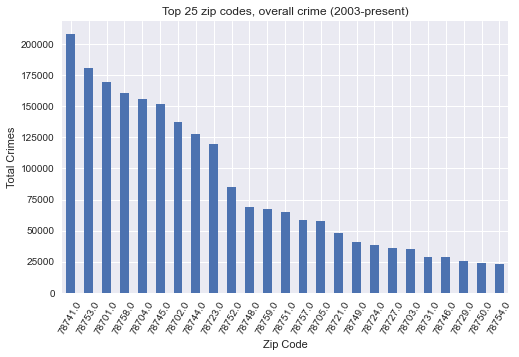

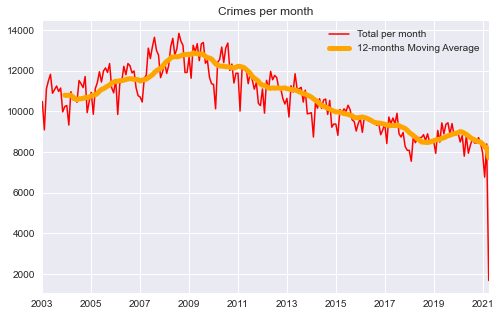

In [8]:
# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25))
display(df.zip_code.value_counts(normalize=True).head(25))

# Visualizing the top 25 crime-ridden zip codes in Austin
df.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes, overall crime (2003-present)",
    figsize=(8, 5),
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(figsize=(8, 5))
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange", linewidth=5, label="12-months Moving Average"
)
plt.title("Crimes per month")
plt.xlabel("")
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

BURGLARY OF VEHICLE               231999
THEFT                             212963
FAMILY DISTURBANCE                181444
CRIMINAL MISCHIEF                 128455
ASSAULT W/INJURY-FAM/DATE VIOL     78658
BURGLARY OF RESIDENCE              77425
DWI                                69976
PUBLIC INTOXICATION                68912
HARASSMENT                         64749
DISTURBANCE - OTHER                62078
Name: highest_offense_description, dtype: int64

,BURGLARY OF VEHICLE,ASSAULT W/INJURY-FAM/DATE VIOL,BURGLARY OF RESIDENCE,CRIMINAL MISCHIEF,PUBLIC INTOXICATION,DWI,HARASSMENT,FAMILY DISTURBANCE,TOTAL
occurred_date,,,,,,,,,
2020-12-31,409,253,187,477,50,165,251,825,2617
2021-01-31,361,256,127,432,55,168,250,815,2464
2021-02-28,311,243,115,338,62,130,166,811,2176
2021-03-31,431,255,155,423,75,181,190,871,2581
2021-04-30,95,65,30,73,17,43,41,71,435


<Figure size 432x288 with 0 Axes>

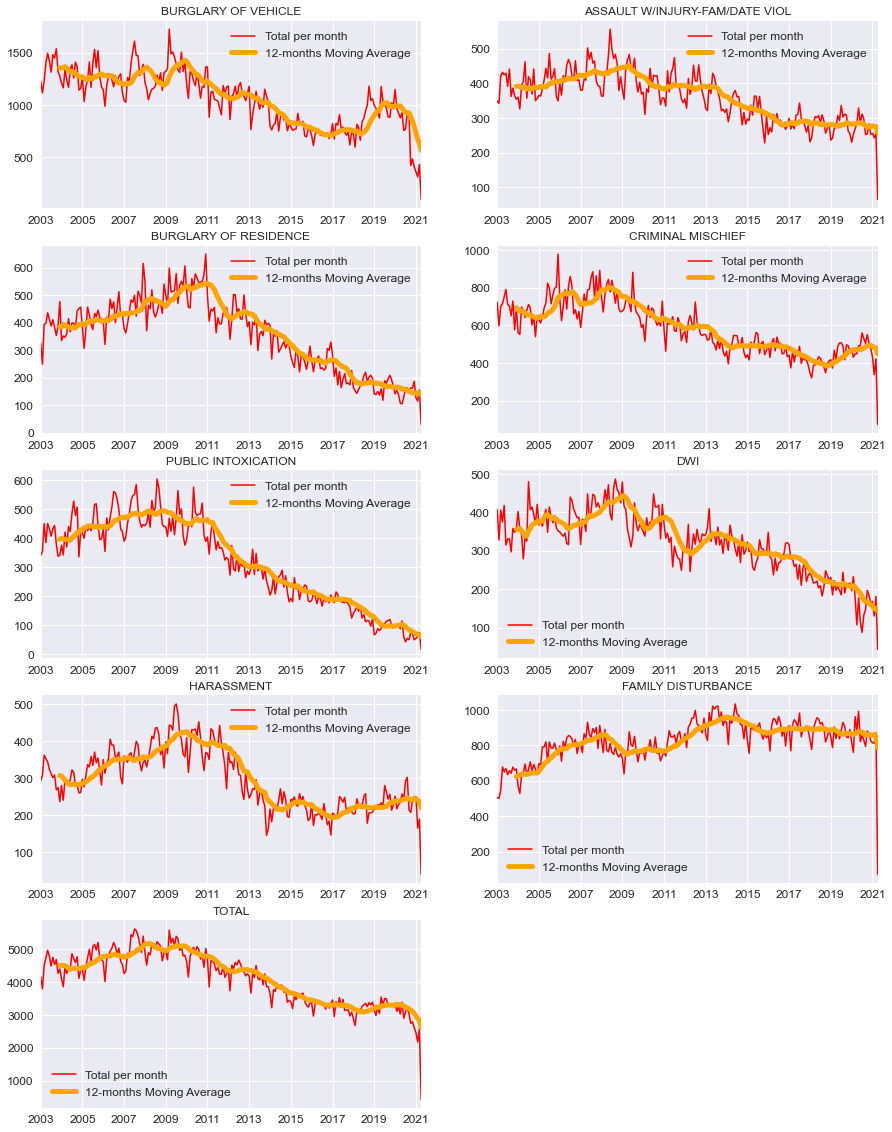

In [9]:
display(df["highest_offense_description"].value_counts().head(10))

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly.tail())

plt.figure(1)
plt.figure(figsize=(15, 20))

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

PUBLIC INTOXICATION               17185
THEFT                             15869
BURGLARY OF VEHICLE                9305
WARRANT ARREST NON TRAFFIC         8967
DWI                                8350
ASSAULT WITH INJURY                7591
VIOL CITY ORDINANCE - OTHER        6189
POSS OF DRUG PARAPHERNALIA         6066
CRIMINAL MISCHIEF                  5877
CRIMINAL TRESPASS                  3943
POSSESSION OF MARIJUANA            3401
DISTURBANCE - OTHER                3378
CUSTODY ARREST TRAFFIC WARR        2993
POSS CONTROLLED SUB/NARCOTIC       2918
CAMPING IN PARK                    2785
VOCO - ALCOHOL  CONSUMPTION        2690
ASSAULT BY CONTACT                 2608
CRIMINAL TRESPASS/TRANSIENT        2592
THEFT OF BICYCLE                   2529
URINATING IN PUBLIC PLACE          2336
FAMILY DISTURBANCE                 2195
DOC FIGHTING                       2128
PROTECTIVE ORDER                   2099
ASSAULT W/INJURY-FAM/DATE VIOL     1743
Name: highest_offense_description, dtype

PUBLIC INTOXICATION               0.101391
THEFT                             0.093627
BURGLARY OF VEHICLE               0.054899
WARRANT ARREST NON TRAFFIC        0.052905
DWI                               0.049265
ASSAULT WITH INJURY               0.044787
VIOL CITY ORDINANCE - OTHER       0.036515
POSS OF DRUG PARAPHERNALIA        0.035789
CRIMINAL MISCHIEF                 0.034674
CRIMINAL TRESPASS                 0.023264
POSSESSION OF MARIJUANA           0.020066
DISTURBANCE - OTHER               0.019930
CUSTODY ARREST TRAFFIC WARR       0.017659
POSS CONTROLLED SUB/NARCOTIC      0.017216
CAMPING IN PARK                   0.016431
VOCO - ALCOHOL  CONSUMPTION       0.015871
ASSAULT BY CONTACT                0.015387
CRIMINAL TRESPASS/TRANSIENT       0.015293
THEFT OF BICYCLE                  0.014921
URINATING IN PUBLIC PLACE         0.013782
FAMILY DISTURBANCE                0.012950
DOC FIGHTING                      0.012555
PROTECTIVE ORDER                  0.012384
ASSAULT W/I

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

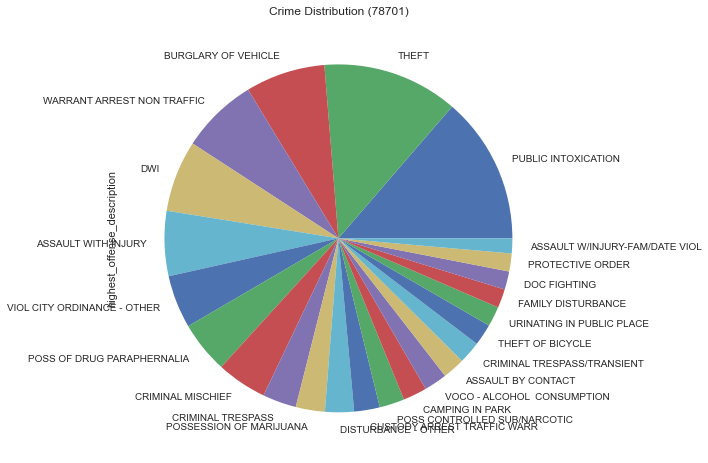

In [10]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off)
display(df_01.highest_offense_description.value_counts(normalize=True).head(24))
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

THEFT                             17233
BURGLARY OF VEHICLE               16004
FAMILY DISTURBANCE                14791
CRIMINAL MISCHIEF                  9531
THEFT BY SHOPLIFTING               7684
ASSAULT W/INJURY-FAM/DATE VIOL     7225
BURGLARY OF RESIDENCE              6096
DWI                                5056
DISTURBANCE - OTHER                4804
CUSTODY ARREST TRAFFIC WARR        4347
HARASSMENT                         4286
AUTO THEFT                         4283
POSS OF DRUG PARAPHERNALIA         3735
PUBLIC INTOXICATION                3376
ASSAULT WITH INJURY                3349
CRIMINAL TRESPASS                  3169
POSS CONTROLLED SUB/NARCOTIC       2998
RUNAWAY CHILD                      2954
WARRANT ARREST NON TRAFFIC         2797
POSSESSION OF MARIJUANA            2714
BURGLARY NON RESIDENCE             2504
VIOL CITY ORDINANCE - OTHER        1868
Name: highest_offense_description, dtype: int64
----------------------------------
THEFT                             0.0

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

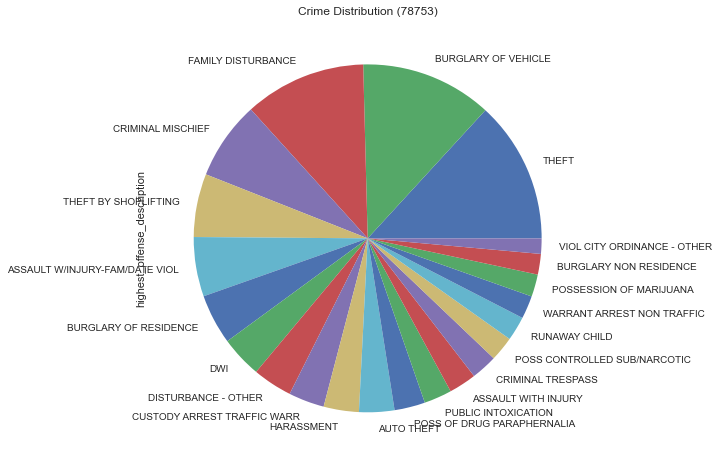

In [11]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
print(df_53_off)
print("----------------------------------")
print(df_53.highest_offense_description.value_counts(normalize=True).head(22))
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

FAMILY DISTURBANCE                20532
BURGLARY OF VEHICLE               19876
THEFT                             15681
CRIMINAL MISCHIEF                 11110
ASSAULT W/INJURY-FAM/DATE VIOL     9674
BURGLARY OF RESIDENCE              8910
PUBLIC INTOXICATION                6394
CUSTODY ARREST TRAFFIC WARR        6011
DWI                                5692
HARASSMENT                         5562
DISTURBANCE - OTHER                5194
AUTO THEFT                         4691
ASSAULT WITH INJURY                4563
CRIMINAL TRESPASS                  3953
POSS CONTROLLED SUB/NARCOTIC       3893
POSSESSION OF MARIJUANA            3799
THEFT BY SHOPLIFTING               3591
POSS OF DRUG PARAPHERNALIA         3547
WARRANT ARREST NON TRAFFIC         3448
RUNAWAY CHILD                      2801
VIOL CITY ORDINANCE - OTHER        2197
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.098554
BURGLARY OF VEHICLE               

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

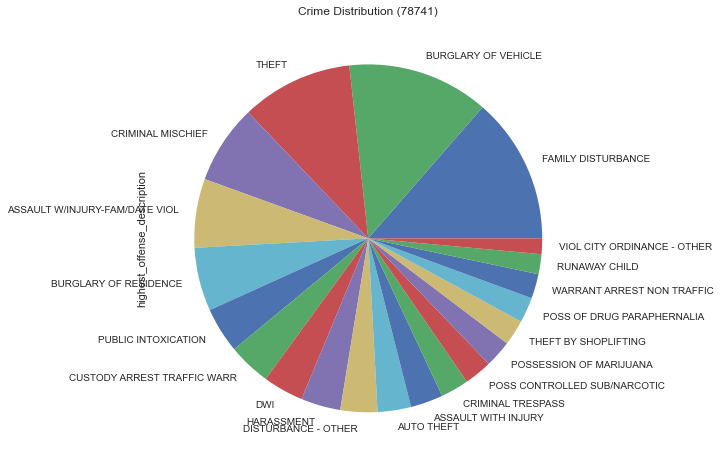

In [12]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
print(df_41_off)
print("----------------------------------")
print(df_41.highest_offense_description.value_counts(normalize=True).head(21))
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

FAMILY DISTURBANCE                15096
BURGLARY OF VEHICLE               14782
THEFT                             13633
CRIMINAL MISCHIEF                  8574
BURGLARY OF RESIDENCE              5879
ASSAULT W/INJURY-FAM/DATE VIOL     5785
HARASSMENT                         5172
DISTURBANCE - OTHER                4555
DWI                                4438
PUBLIC INTOXICATION                4009
CUSTODY ARREST TRAFFIC WARR        3248
AUTO THEFT                         2889
BURGLARY NON RESIDENCE             2885
ASSAULT WITH INJURY                2701
RUNAWAY CHILD                      2612
POSSESSION OF MARIJUANA            2594
WARRANT ARREST NON TRAFFIC         2109
POSS CONTROLLED SUB/NARCOTIC       2047
THEFT BY SHOPLIFTING               2007
CRIMINAL TRESPASS                  1968
IDENTITY THEFT                     1639
POSS OF DRUG PARAPHERNALIA         1527
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.0

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

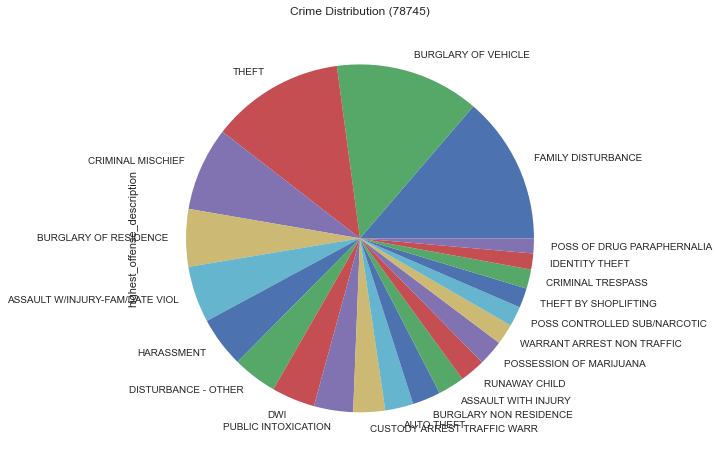

In [13]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
print(df_45_off)
print("----------------------------------")
print(df_45.highest_offense_description.value_counts(normalize=True).head(22))
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

BURGLARY OF VEHICLE               8678
THEFT                             5648
CRIMINAL MISCHIEF                 4994
THEFT OF BICYCLE                  3510
PUBLIC INTOXICATION               2630
BURGLARY OF RESIDENCE             2129
WARRANT ARREST NON TRAFFIC        1550
CRIMINAL TRESPASS                 1359
AUTO THEFT                        1350
ASSAULT WITH INJURY               1266
HARASSMENT                        1225
DWI                               1219
FAMILY DISTURBANCE                1211
DISTURBANCE - OTHER               1127
BURGLARY NON RESIDENCE             887
CRIMINAL TRESPASS/TRANSIENT        868
VIOL CITY ORDINANCE - OTHER        792
GRAFFITI                           783
CUSTODY ARREST TRAFFIC WARR        782
ASSAULT W/INJURY-FAM/DATE VIOL     703
POSSESSION OF MARIJUANA            661
ASSAULT BY CONTACT                 625
Name: highest_offense_description, dtype: int64

'----------------------------------'

BURGLARY OF VEHICLE               0.150459
THEFT                             0.097925
CRIMINAL MISCHIEF                 0.086586
THEFT OF BICYCLE                  0.060856
PUBLIC INTOXICATION               0.045599
BURGLARY OF RESIDENCE             0.036912
WARRANT ARREST NON TRAFFIC        0.026874
CRIMINAL TRESPASS                 0.023562
AUTO THEFT                        0.023406
ASSAULT WITH INJURY               0.021950
HARASSMENT                        0.021239
DWI                               0.021135
FAMILY DISTURBANCE                0.020996
DISTURBANCE - OTHER               0.019540
BURGLARY NON RESIDENCE            0.015379
CRIMINAL TRESPASS/TRANSIENT       0.015049
VIOL CITY ORDINANCE - OTHER       0.013732
GRAFFITI                          0.013576
CUSTODY ARREST TRAFFIC WARR       0.013558
ASSAULT W/INJURY-FAM/DATE VIOL    0.012189
POSSESSION OF MARIJUANA           0.011460
ASSAULT BY CONTACT                0.010836
Name: highest_offense_description, dtype: float64

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

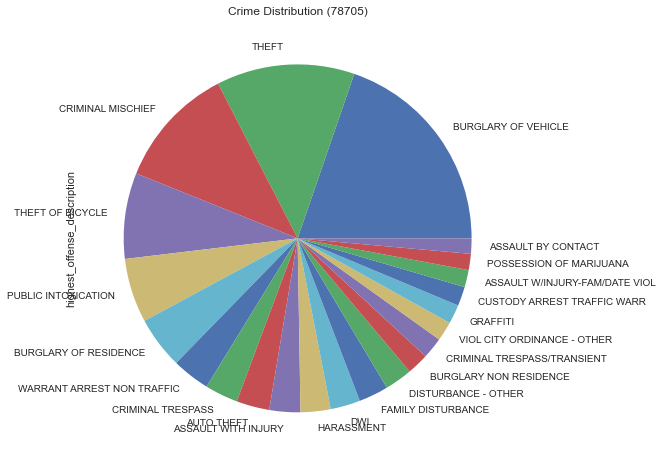

In [14]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off)
display("----------------------------------")
display(df_05.highest_offense_description.value_counts(normalize=True).head(22))
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

BURGLARY OF VEHICLE               5415
THEFT                             5101
THEFT BY SHOPLIFTING              2553
CRIMINAL MISCHIEF                 1276
DWI                                882
FAMILY DISTURBANCE                 766
VIOL CITY ORDINANCE - OTHER        652
HARASSMENT                         632
AUTO THEFT                         610
BURGLARY OF RESIDENCE              522
THEFT FROM PERSON                  462
IDENTITY THEFT                     448
DISTURBANCE - OTHER                434
BURGLARY NON RESIDENCE             359
ASSAULT W/INJURY-FAM/DATE VIOL     340
CRED CARD ABUSE - OTHER            327
PUBLIC INTOXICATION                321
POSSESSION OF MARIJUANA            297
FRAUD - OTHER                      282
SUSPICIOUS PERSON                  259
CUSTODY ARREST TRAFFIC WARR        247
WARRANT ARREST NON TRAFFIC         223
ASSAULT WITH INJURY                198
VIOL WATER SAFETY ACT              195
Name: highest_offense_description, dtype: int64

BURGLARY OF VEHICLE               0.191079
THEFT                             0.179999
THEFT BY SHOPLIFTING              0.090088
CRIMINAL MISCHIEF                 0.045026
DWI                               0.031123
FAMILY DISTURBANCE                0.027030
VIOL CITY ORDINANCE - OTHER       0.023007
HARASSMENT                        0.022301
AUTO THEFT                        0.021525
BURGLARY OF RESIDENCE             0.018420
THEFT FROM PERSON                 0.016303
IDENTITY THEFT                    0.015809
DISTURBANCE - OTHER               0.015315
BURGLARY NON RESIDENCE            0.012668
ASSAULT W/INJURY-FAM/DATE VIOL    0.011998
CRED CARD ABUSE - OTHER           0.011539
PUBLIC INTOXICATION               0.011327
POSSESSION OF MARIJUANA           0.010480
FRAUD - OTHER                     0.009951
SUSPICIOUS PERSON                 0.009139
CUSTODY ARREST TRAFFIC WARR       0.008716
WARRANT ARREST NON TRAFFIC        0.007869
ASSAULT WITH INJURY               0.006987
VIOL WATER 

<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

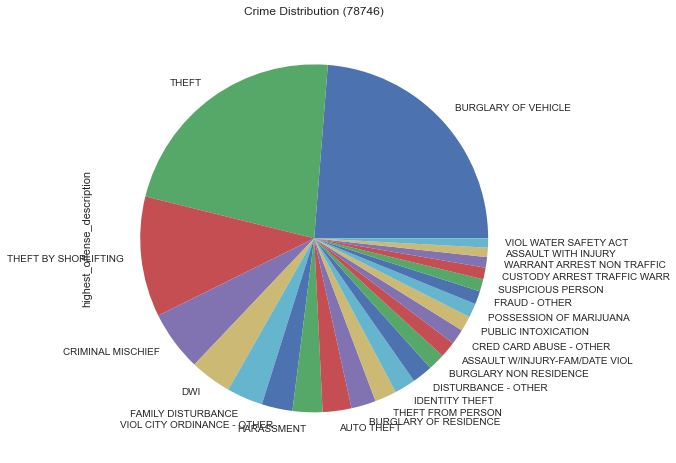

In [15]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off)
display(df_46.highest_offense_description.value_counts(normalize=True).head(24))
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed? 

In [16]:
# Creating separate dataframes for overall & violent crime
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')
df_agg_asslt = df[df.highest_offense_description == "AGG ASSAULT"]
df_agg_robbery = df[df.highest_offense_description == "AGG ROBBERY/DEADLY WEAPON"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

# Annual murders
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]

78741.0    0.130608
78753.0    0.099204
78758.0    0.094515
78701.0    0.074850
78723.0    0.074411
78702.0    0.074007
78745.0    0.057782
78752.0    0.052385
78744.0    0.051879
78704.0    0.048270
78721.0    0.027795
78724.0    0.024455
78705.0    0.021521
78757.0    0.020677
78748.0    0.017439
78751.0    0.017034
78759.0    0.013762
78722.0    0.009445
78754.0    0.008365
78727.0    0.007927
78749.0    0.007826
78617.0    0.007657
78729.0    0.007151
78750.0    0.005734
78731.0    0.005228
Name: zip_code, dtype: float64

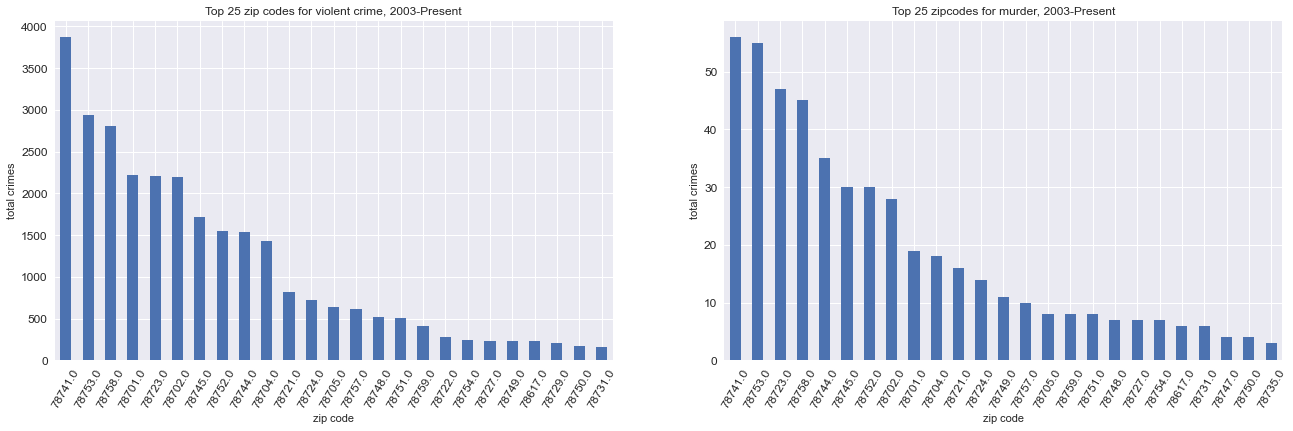

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
zip_code,,,,,
78610.0,1,0,0,0,0
78613.0,15,11,0,1,7
78617.0,122,62,0,6,37
78621.0,1,0,0,0,0
78634.0,1,0,0,0,0
78652.0,2,0,0,0,0
78653.0,10,3,0,1,1
78660.0,64,30,0,2,17
78664.0,3,0,0,0,0


<Figure size 432x288 with 0 Axes>

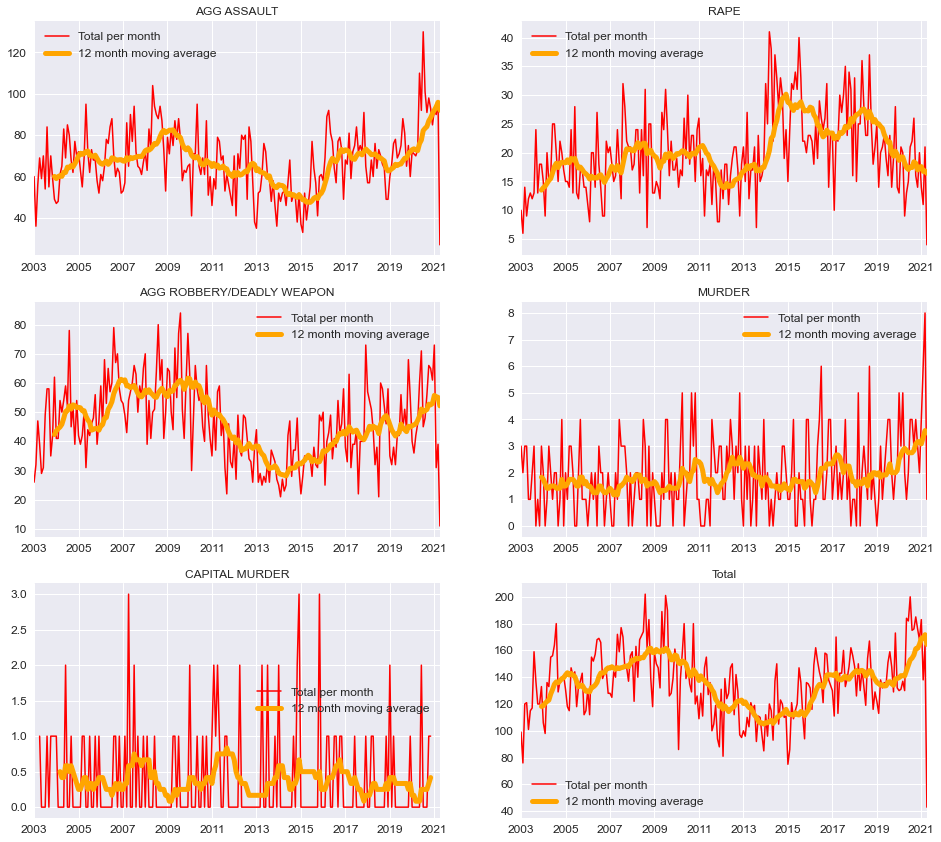

In [17]:
display(df_viol.zip_code.value_counts(normalize=True).head(25))

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes for violent crime, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[0],
)
df_viol_mur.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zipcodes for murder, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.highest_offense_description)
mur_freq = pd.crosstab(df_viol_mur.zip_code, df_viol_mur.highest_offense_description)
display(viol_freq)

monthly = pd.DataFrame(
    df_viol[df_viol["highest_offense_description"] == "AGG ASSAULT"]
    .resample("M")
    .size()
)
monthly.columns = ["AGG ASSAULT"]

for i in df_viol["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df_viol[df_viol["highest_offense_description"] == i].resample("M").size()
    )

monthly["Total"] = monthly.sum(axis=1)

crimeTypes = monthly.columns

plt.figure(1)
plt.figure(figsize=(16, 25))

i = 521
for eachCrime in crimeTypes:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1

### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

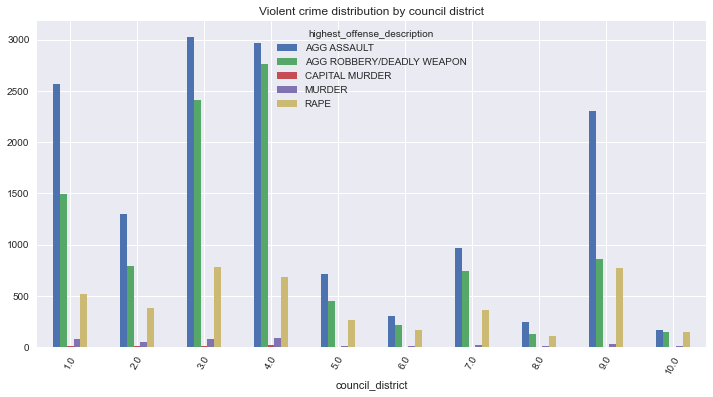

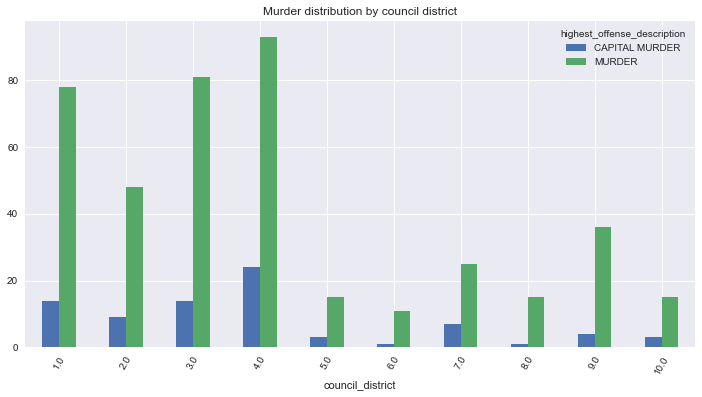

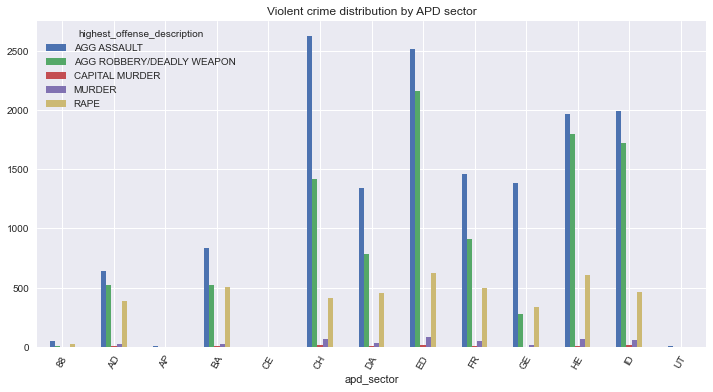

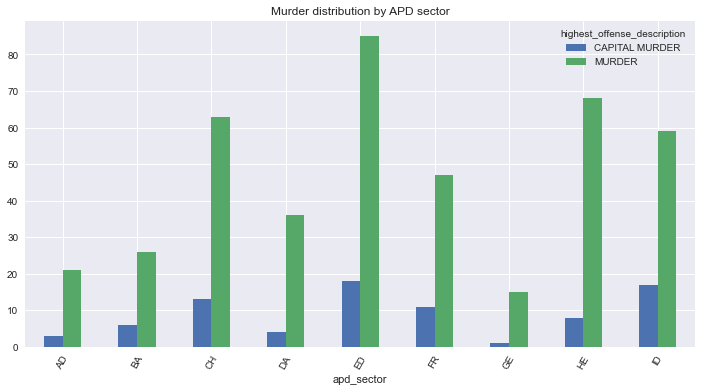

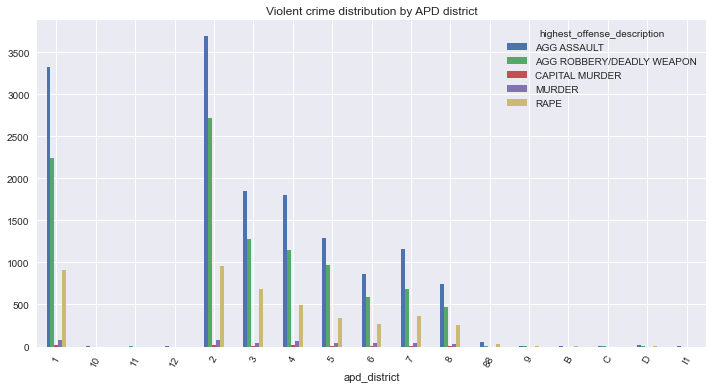

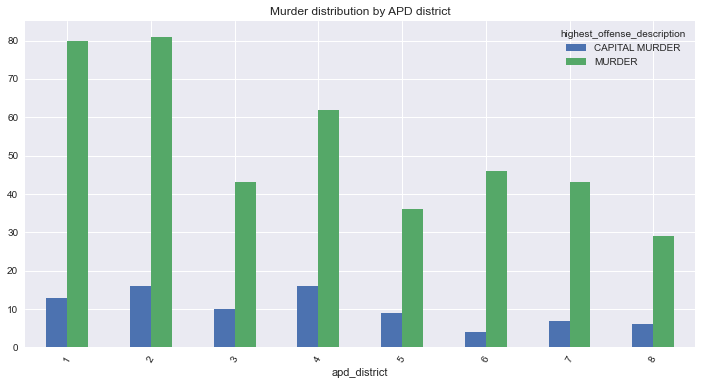

In [18]:
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by council district"
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(figsize=(12, 6), rot=60, title="Murder distribution by council district")
plt.show()

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD district"
)
plt.show()

### K. Violent crime and murder distribution by location type

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
location_type,,,,,
ABANDONED/CONDEMNED STRUCTURE,14,7,0,1,4
AMUSEMENT PARK,0,2,0,0,0
ARENA / STADIUM / FAIRGROUNDS / COLISEUM,2,0,0,0,0
ATM SEPARATE FROM BANK,1,3,0,0,0
AUTO DEALERSHIP NEW / USED,10,2,0,0,1
BANKS / SAVINGS & LOAN,5,134,0,1,1
BAR / NIGHT CLUB,670,46,2,8,79
CAMP / CAMPGROUND,23,2,0,0,3
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,20,5,1,0,7


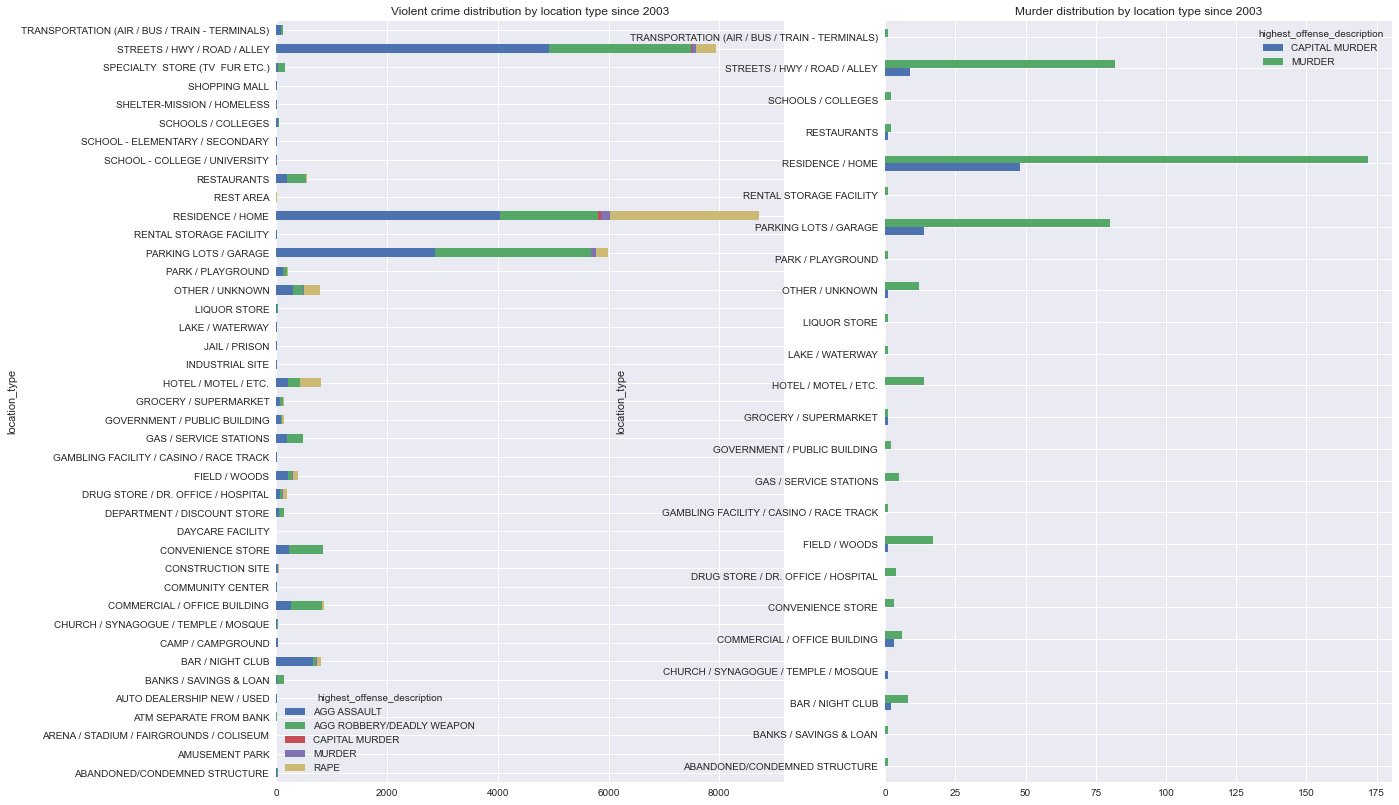

In [19]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)
mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

fig, axs = plt.subplots(figsize=(20, 14), ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003",
    ax=axs[0],
    stacked=True,
)
mur_loc.plot.barh(title="Murder distribution by location type since 2003", ax=axs[1])
plt.show()

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [20]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Armed robbery 

In [21]:
agg_robbery_coords_heat = df_agg_robbery[
    (df_agg_robbery["latitude"].isnull() == False)
    & (df_agg_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [22]:
mur_coords_heat = df_viol_mur[
    (df_viol_mur["latitude"].isnull() == False)
    & (df_viol_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [23]:
df.address.value_counts().head(50)

4110 GUADALUPE ST                 11581
1030 NORWOOD PARK BLVD             9223
2901 S CAPITAL OF TEXAS HWY NB     8129
3600 PRESIDENTIAL BLVD             7372
500 E 7TH ST                       6119
1000 E 41ST ST                     5829
3708 S 2ND ST                      5257
2508 E RIVERSIDE DR                4835
11200 LAKELINE MALL DR             4506
9300 S IH 35 SVRD SB               4077
715 E 8TH ST                       4007
9414 N LAMAR BLVD                  3871
1137 GUNTER ST                     3205
710 E BEN WHITE BLVD SVRD WB       3197
6001 AIRPORT BLVD                  2922
12900 N IH 35 SVRD SB              2815
5800 TECHNI CENTER DR              2760
2701 E 7TH ST                      2721
5901 AIRPORT BLVD                  2718
6118 FAIRWAY ST                    2675
1300 CROSSING PL                   2639
1515 WICKERSHAM LN                 2453
6409 SPRINGDALE RD                 2440
2400 S CONGRESS AVE                2439
601 E 15TH ST                      2362


In [24]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(13)

500 E 7TH ST                83
9515 N LAMAR BLVD           66
1700 BURTON DR              63
00 BLOCK UNKNOWN            59
6409 SPRINGDALE RD          59
9601 MIDDLE FISKVILLE RD    58
900 BLOCK E 32ND ST         56
1071 CLAYTON LN             53
1030 NORWOOD PARK BLVD      53
9200 NORTH PLZ              53
6103 MANOR RD               52
1137 GUNTER ST              51
2237 E RIVERSIDE DR         51
Name: address, dtype: int64

In [25]:
# Show addresses with 2 or more reported murders
df_viol_mur.address.value_counts().head(30)

8800 N IH 35 SVRD SB         3
6409 SPRINGDALE RD           3
8610 N LAMAR BLVD            3
4700 E RIVERSIDE DR          3
6407 SPRINGDALE RD           3
9220 N IH 35 SVRD SB         2
2400 WICKERSHAM LN           2
605 MASTERSON PASS           2
11105 N IH 35 SVRD NB        2
815 W SLAUGHTER LN           2
6118 FAIRWAY ST              2
10610 MORADO CIR             2
7330 BLUFF SPRINGS RD        2
2915 S IH 35 SVRD NB         2
2508 E RIVERSIDE DR          2
744 W WILLIAM CANNON DR      2
6600 ED BLUESTEIN BLVD SB    2
9601 MIDDLE FISKVILLE RD     2
7000 DECKER LN               2
1711 RUTLAND DR              2
9010 GALEWOOD DR             2
8225 SAM RAYBURN DR          2
2501 ANKEN DR                2
1137 GUNTER ST               2
10503 N LAMAR BLVD           2
833 FAIRFIELD DR             2
9200 NORTH PLZ               2
1050 SPRINGDALE RD           2
2713 S CONGRESS AVE          2
8912 N LAMAR BLVD            2
Name: address, dtype: int64

In [26]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")

df_viol_mur_17.to_csv("df_viol_mur_17.csv")
df_viol_mur_18.to_csv("df_viol_mur_18.csv")
df_viol_mur_19.to_csv("df_viol_mur_19.csv")
df_viol_mur_20.to_csv("df_viol_mur_20.csv")

df_viol.to_csv("df_viol.csv")
df_viol_mur.to_csv("df_viol_mur.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")